# EMOTION RECOGNITION THROUGH VOICE

In [9]:
pip install tensorflow

   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/385.0 MB 16.8 MB/s eta 0:00:23
   ---------------------------------------- 1.9/385.0 MB 20.4 MB/s eta 0:00:19
   ---------------------------------------- 3.0/385.0 MB 21.2 MB/s eta 0:00:19
   ---------------------------------------- 3.8/385.0 MB 22.3 MB/s eta 0:00:18
   ---------------------------------------- 4.8/385.0 MB 23.7 MB/s eta 0:00:17
    --------------------------------------- 6.1/385.0 MB 23.1 MB/s eta 0:00:17
    --------------------------------------- 6.8/385.0 MB 24.1 MB/s eta 0:00:16
    --------------------------------------- 7.8/385.0 MB 23.8 MB/s eta 0:00:16
    --------------------------------------- 8.7/385.0 MB 23.1 MB/s eta 0:00:17
    --------------------------------------- 9.5/385.0 MB 23.5 MB/s eta 0:00:16
   - -------------------------------------- 10.8/385.0 MB 25.2 MB/s eta 0:00:15
   - -------------------------------------- 11.9/385.0 MB 2


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [11]:
# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions ( feel free to tune this on your need )
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}

In [12]:
def extract_mfcc(file_name):
    y,sr=librosa.load(file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40),axis=1) #y represents the amplitudes .
    #sr(sample rate) represents no.of waves per second.n_mfcc(number of MFCCs to return)is set to 40 because there can be differnt amplitudes so it will take till 40
    #axis=1 means mean is calculated column wise(if axis=0 row wise)
    #y,sr,n_mfcc are the inputs to librosa.feature.mfcc fuction which calcutes the mfcc feature once it is calculated mean of it is taken col wise
    return(mfccs)

In [14]:
y,sr=librosa.load(r'C:/Users/karth\Downloads/ML-3 FINAL/ML-3 FINAL/MPData1/Actor_10/03-01-01-01-01-02-10.wav') # entire path has to be given
x=librosa.feature.mfcc(y=y,sr=sr)
x.shape
#(20,166) means mfcc is not a single value it is got 20 rows n 166 col

(20, 166)

In [15]:
z=np.mean(x,axis=1)

In [16]:
z.shape

(20,)

In [17]:
y

array([ 2.5695667e-06, -7.7466524e-05,  1.2838683e-04, ...,
        9.0111193e-05,  8.3490988e-05,  5.6377190e-05], dtype=float32)

In [18]:
sr # sr is a single value

22050

In [19]:
y.shape[0]/sr # y gives wav  sr gives wav/sec so wav/(wav/sec) gives sec i.e time...here time of the audio recorded

3.83718820861678

### extract audio data from the dataset

In [23]:
root_dic='C:/Users/karth/Downloads/ML-3 FINAL/ML-3 FINAL/MPData1' # entire path has to be given
data=[]
labels=[]
for subdirs,dirs,files in os.walk(root_dic):
    for file in files:
        temp_lable = int2emotion[str(file[6:8])]
        if temp_lable in AVAILABLE_EMOTIONS:
            y,sr=librosa.load(os.path.join(subdirs,file)) #for librosa load we have to give the entire path so we join subdir(path for dictonary) and file(.wav file)
            mfccs = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40),axis=1)
            data.append(mfccs)
            labels.append(int(file[7:8])-1) # file name 03-01-06-01-01-01-11 index value 0,1..... it takes 7th index value i.e the lable for the emotion
        # -1 will make the labels from 0-7 rather than 1-8

In [24]:
#store them to arrays for testing
data_array=np.array(data)
labels_array=np.array(labels)
data_array.shape

(672, 40)

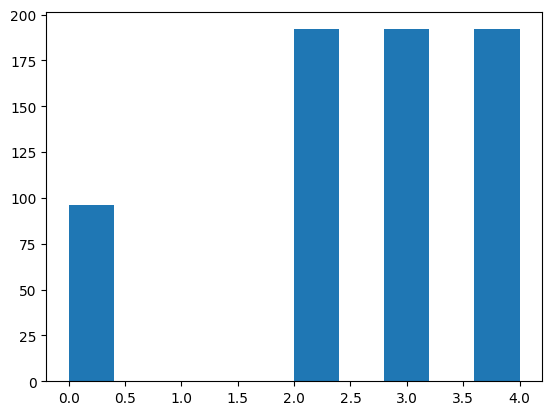

In [25]:
plt.hist(labels)
plt.show()

In [26]:
data_array.shape

(672, 40)

In [27]:
labels_array.shape

(672,)

In [28]:
labels

[0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,


In [32]:
##### load data from savee dataset
#### although, we load the data here, it is not used in training or validation
root_dir = "C:/Users/karth/Downloads/ML-3 FINAL/ML-3 FINAL/SAVEE" # entire path has to be given
# root_dir = "../input/audio_speech_actors_01-24/"
savee_data = []
savee_labels = []
for actor_dir in sorted(os.listdir(root_dir)):
    if actor_dir[-4:] == ".txt":
        continue
    for file_name in os.listdir(os.path.join(root_dir, actor_dir)):
        if file_name[0] == "c":
            continue
        wav_file_name = os.path.join(root_dir, actor_dir, file_name)
        if file_name[0] == "n":
            savee_labels.append(0)
            savee_data.append(extract_mfcc(wav_file_name))
        if file_name[0] == "a":
            savee_labels.append(4)
            savee_data.append(extract_mfcc(wav_file_name))
        if file_name[0] == "h":
            savee_labels.append(2)
            savee_data.append(extract_mfcc(wav_file_name))
        if file_name[:2] == "sa":
            savee_labels.append(3)
            savee_data.append(extract_mfcc(wav_file_name))

In [33]:
savee_data_array = np.asarray(savee_data)
savee_label_array = np.array(savee_labels)

In [34]:
savee_data_array.shape

(300, 40)

In [35]:
savee_label_array

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [37]:
### load RAVDESS song data
root_dir = "C:/Users/karth/Downloads/ML-3 FINAL/ML-3 FINAL/audio_song_actors_01-24" # entire path has to be given
radvess_song_labels = []
ravdess_song_data = []
for actor_dir in sorted(os.listdir(root_dir)):
    actor_name = os.path.join(root_dir, actor_dir)
    for file in os.listdir(actor_name):
        temp_lable = int2emotion[str(file[6:8])]
        if temp_lable in AVAILABLE_EMOTIONS:
            radvess_song_labels.append(int(file[7:8])-1)
            wav_file_name = os.path.join(root_dir, actor_dir, file)
            ravdess_song_data.append(extract_mfcc(wav_file_name))


In [38]:
ravdess_song_data_array = np.asarray(ravdess_song_data)
ravdess_song_label_array = np.array(radvess_song_labels)
ravdess_song_data_array.shape

(644, 40)

In [39]:
ravdess_song_label_array.shape

(644,)

In [40]:
 #### combine data
data_f= np.r_[data_array, savee_data_array,ravdess_song_data_array]
labels_f= np.r_[labels_array,savee_label_array,ravdess_song_label_array ]
# data = ravdess_speech_data_array
# labels = ravdess_speech_label_array
labels_f.shape

(1616,)

In [41]:
labels_f

array([0, 0, 0, ..., 4, 4, 4])

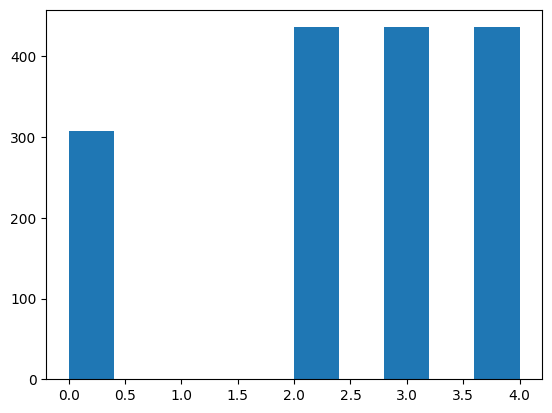

In [42]:
plt.hist(labels_f)
plt.show()

In [43]:
#changing labels to categorical
labels_categorical=to_categorical(labels_f)
data_f.shape
labels_categorical.shape

(1616, 5)

In [44]:
labels_categorical

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [45]:
len(labels)

672

In [46]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

In [47]:
def create_model_CNN():
    ### CNN model, referred to the model in the report
    model = Sequential()
    model.add(Conv1D(8, kernel_size = 3, input_shape=(40, 1)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv1D(16,kernel_size = 3))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Conv1D(32, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv1D(16, kernel_size = 3))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1))
    model.add(Dropout(0.5))
    model.add(Dense(5))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [48]:
#split data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data_f,labels_categorical,random_state=7,test_size=0.3)

In [49]:
#number_of_samples = data_f.shape[0]
#training_samples = int(number_of_samples * 0.8)
#validation_samples = int(number_of_samples * 0.1)
#test_samples = int(number_of_samples * 0.1)

In [50]:
model_B = create_model_CNN()

c:\Users\karth\OneDrive\Desktop\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
history = model_B.fit(np.expand_dims(X_train,-1), Y_train, 
                      validation_data=(np.expand_dims(X_test ,-1), 
                                       Y_test), epochs=250,
                      shuffle=True)

Epoch 1/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7826 - loss: 0.5342 - val_accuracy: 0.7979 - val_loss: 0.5402
Epoch 2/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7950 - loss: 0.5048 - val_accuracy: 0.7979 - val_loss: 0.5051
Epoch 3/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7930 - loss: 0.5095 - val_accuracy: 0.8124 - val_loss: 0.5114
Epoch 4/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8035 - loss: 0.4932 - val_accuracy: 0.7856 - val_loss: 0.5317
Epoch 5/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7980 - loss: 0.5352 - val_accuracy: 0.8000 - val_loss: 0.5380
Epoch 6/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7963 - loss: 0.4806 - val_accuracy: 0.7959 - val_loss: 0.5344
Epoch 7/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8155 - loss: 0.4928 - val_accuracy: 0.7979 - val_loss: 0.5176
Epoch 8/250
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7984 - loss: 0.5239 - val_accuracy: 0.8124 - v

###  evaluate  model 

In [53]:
model_B.evaluate(np.expand_dims(X_test, -1), Y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8085 - loss: 0.5092 


[0.5106685757637024, 0.8144329786300659]

In [54]:
print(model_B.evaluate(np.expand_dims(X_test, -1), Y_test)[1]*100 , "%")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8085 - loss: 0.5092 
81.44329786300659 %


In [55]:
model_B.save('4EmotionsModel.h5')

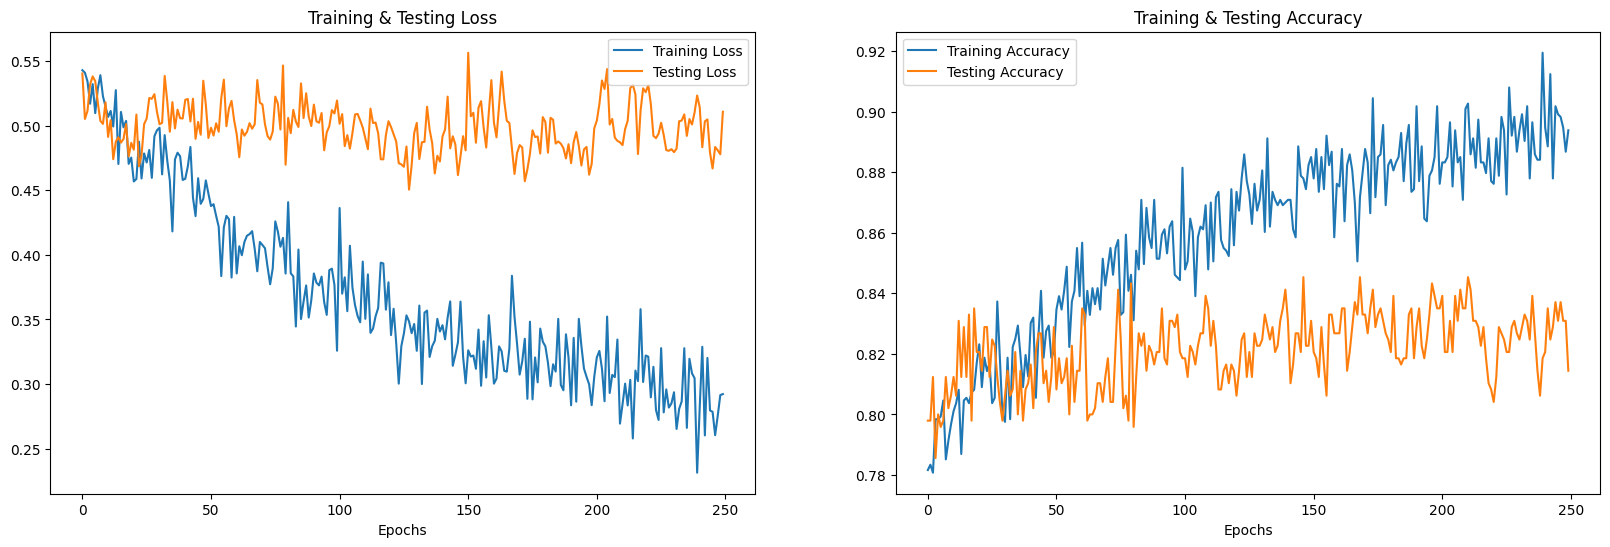

In [64]:
epochs = [i for i in range(250)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [65]:
import pyaudio
import os
import wave
import pickle
from sys import byteorder
from array import array
from struct import pack

intemotion = {
    0: "neutral",
    1: "calm",
    2: "happy",
    3: "sad",
    4: "angry",
    5: "fearful",
    6: "disgust",
    7: "surprised"
}


THRESHOLD = 500
CHUNK_SIZE = 1024
FORMAT = pyaudio.paInt16
RATE = 16000

SILENCE = 30

def is_silent(snd_data):
    "Returns 'True' if below the 'silent' threshold"
    return max(snd_data) < THRESHOLD

def normalize(snd_data):
    "Average the volume out"
    MAXIMUM = 16384
    times = float(MAXIMUM)/max(abs(i) for i in snd_data)

    r = array('h')
    for i in snd_data:
        r.append(int(i*times))
    return r

def trim(snd_data):
    "Trim the blank spots at the start and end"
    def _trim(snd_data):
        snd_started = False
        r = array('h')

        for i in snd_data:
            if not snd_started and abs(i)>THRESHOLD:
                snd_started = True
                r.append(i)

            elif snd_started:
                r.append(i)
        return r

    # Trim to the left
    snd_data = _trim(snd_data)

    # Trim to the right
    snd_data.reverse()
    snd_data = _trim(snd_data)
    snd_data.reverse()
    return snd_data

def add_silence(snd_data, seconds):
    "Add silence to the start and end of 'snd_data' of length 'seconds' (float)"
    r = array('h', [0 for i in range(int(seconds*RATE))])
    r.extend(snd_data)
    r.extend([0 for i in range(int(seconds*RATE))])
    return r

def record():
    """
    Record a word or words from the microphone and 
    return the data as an array of signed shorts.
    Normalizes the audio, trims silence from the 
    start and end, and pads with 0.5 seconds of 
    blank sound to make sure VLC et al can play 
    it without getting chopped off.
    """
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT, channels=1, rate=RATE,
        input=True, output=True,
        frames_per_buffer=CHUNK_SIZE)

    num_silent = 0
    snd_started = False

    r = array('h')

    while 1:
        # little endian, signed short
        snd_data = array('h', stream.read(CHUNK_SIZE))
        if byteorder == 'big':
            snd_data.byteswap()
        r.extend(snd_data)

        silent = is_silent(snd_data)

        if silent and snd_started:
            num_silent += 1
        elif not silent and not snd_started:
            snd_started = True

        if snd_started and num_silent > SILENCE:
            break

    sample_width = p.get_sample_size(FORMAT)
    stream.stop_stream()
    stream.close()
    p.terminate()

    r = normalize(r)
    r = trim(r)
    r = add_silence(r, 0.5)
    return sample_width, r

def record_to_file(path):
    "Records from the microphone and outputs the resulting data to 'path'"
    sample_width, data = record()
    data = pack('<' + ('h'*len(data)), *data)

    wf = wave.open(path, 'wb')
    wf.setnchannels(1)
    wf.setsampwidth(sample_width)
    wf.setframerate(RATE)
    wf.writeframes(data)
    wf.close()



if __name__ == "__main__":
    # load the saved model (after training)
#     model = pickle.load(open("result/mlp_classifier.model", "rb"))
    print("Please talk")
    filename = "test.wav"
    # record the file (start talking)
    record_to_file(filename)
    # extract features and reshape it
    features = extract_mfcc(filename)
    # predict
    result = model_B.predict(features.reshape(1,40,1))[0]
    # show the result !
#     print("result:", result)
    print(intemotion[np.argmax(result)])

Please talk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
angry
